References:
- [Jon Lee: A First Course in Linear Optimization](https://github.com/jon77lee/JLee_LinearOptimizationBook)

## Portfolio Optimization  <a name="Portfolio-Optimization"></a>
Portfolio optimization has two competing objectives: high return and low risk.

**Variables**:
* $\mu$: Expected returns
* $N$: Number of assets
* $w_i$: Fraction of money to invest in asset $i$
* $\Sigma$: Covariance matrix which quantifies how different assets in a portfolio move relative to each other.
* $\gamma>0$: Risk aversion parameter

**Objective**: maximize $\mu^T w - \gamma w^T\Sigma w$  (risk-adjusted return)

**Constraints**:
* $\sum_{i=0}^N w_i = 1$
* $w_i >= 0$

In [17]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

expected_returns = np.array([0.08, 0.12, 0.15, 0.06])  # [Bonds, VTI, International, Small-Cap]
# volatilities = np.array([0.05, 0.15, 0.20, 0.25])
weights = cp.Variable(len(expected_returns))
risk_aversion = 0.0

covariance_matrix = np.array([
    [1.0, 0.3, 0.2, 0.1],
    [0.3, 1.0, 0.4, 0.5],
    [0.2, 0.4, 1.0, 0.6],
    [0.1, 0.5, 0.6, 1.0]
])

constraints = [cp.sum(weights) == 1, weights >= 0]
portfolio_variance = cp.quad_form(weights, covariance_matrix)
objective = cp.Maximize(expected_returns.T @ weights - portfolio_variance * risk_aversion)
problem = cp.Problem(objective, constraints)
problem.solve()
optimal_weights = weights.value
optimal_weights

array([-2.14111410e-28, -2.14378344e-28,  1.00000000e+00, -2.13978135e-28])

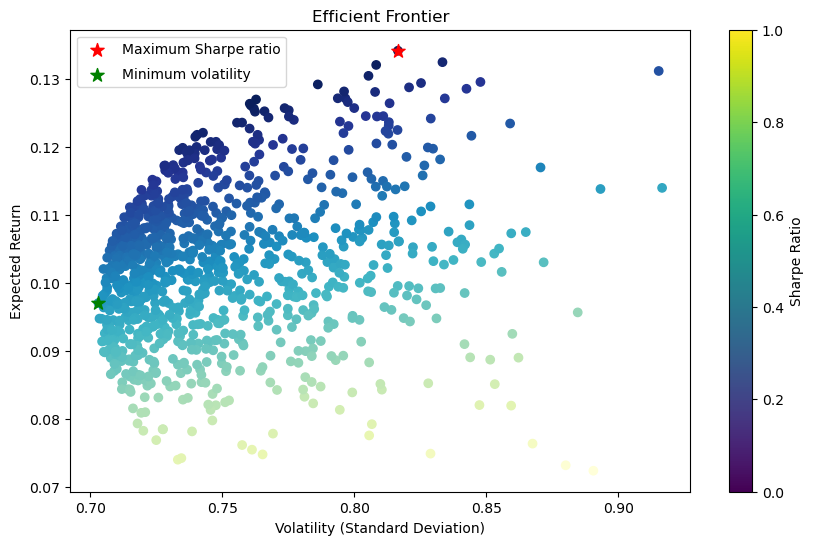

In [21]:
def calculate_portfolio_performance(weights, expected_returns, covariance_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_return, portfolio_risk

risk_free_rate = 0.03
num_portfolios = 1000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)
    portfolio_return, portfolio_risk = calculate_portfolio_performance(weights, expected_returns, covariance_matrix)
    results[0,i] = portfolio_risk
    results[1,i] = portfolio_return
    results[2,i] = (portfolio_return - risk_free_rate) / portfolio_risk  # Sharpe ratio
    weights_record.append(weights)

max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights_record[max_sharpe_idx], index=['Bonds', 'VTI', 'International', 'Small-Cap'], columns=['allocation'])

min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
min_vol_allocation = pd.DataFrame(weights_record[min_vol_idx], index=['Bonds', 'VTI', 'International', 'Small-Cap'], columns=['allocation'])

plt.figure(figsize=(10, 6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.scatter(sdp, rp, marker='*', color='r', s=100, label='Maximum Sharpe ratio')
plt.scatter(sdp_min, rp_min, marker='*', color='g', s=100, label='Minimum volatility')

plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.legend(labelspacing=0.8)
plt.show()